# Capítulo 2 - Soluções de equações em uma variável #

Os métodos numéricos discutidos neste capítulo visam aproximar soluções para equações de uma variável quando as soluções exatas destas equações não podem ser obtidas através de métodos algébricos, como, por exemplo, a equação $90000 e^{\lambda} + \frac{10500}{\lambda} (e^{\lambda} -1) - 125000 = 0$. Estes métodos se utilizam de teoremas matemáticos para criar algoritmos iterativos que convergem para a solução da equação, quando os parâmetros iniciais são adequadamente escolhidos. Cada método possui suas especificidades e critérios de convergência, como veremos a seguir. Os métodos serão implementados para resolver uma das questões básicias da aproximação numérica: a determinação de raizes (ou zeros) de uma função do tipo $f(x) = 0$.



## Método da Bissecção ##

O método da Bissecção baseia-se no **Teorema do Valor Intermediário**: se $f$ for uma função contínua definida no intervalo $[a, b]$, com $f(a)$ e $f(b)$ de sinais opostos, ou seja, $f(a) . f(b) < 0$, existirá um número $p$ em $(a, b)$ com $f(p) = 0$. 

Basicamente o método da Bissecção inicia com um intervalo $[a, b]$ no qual uma raiz da função $f$ está presente (ou seja, $f(a) . f(b) < 0$), e vai bissectando este intervalo (dividindo-o ao meio) convenientemente de modo que a raiz sempre esteja dentro do subintervalo criado. A subdivisão acontece da seguinte forma: $${p}_{n}={a}_{n}+\frac{{b}_{n}-{a}_{n}}{2}=\frac{{a}_{n}+{b}_{n}}{2}$$A cada subdivisão, o ponto médio do intervalo, $p$, é testado: se $f(p) = 0$ (ou atende aos critérios de tolerância) então $p$ é raiz da equação e o método é encerrado. Caso contrário, uma nova subdivisão é realizada, avaliando os pontos $a$, $b$, e o ponto médio entre eles, $p$: se $f(a) . f(p) < 0$ significa que a raiz da função está no intervalo $[a, p]$, e desta forma para a próxima iteração $a$ mantém o seu valor e $b$ assume o valor de $p$; caso o contrário, se $f(p) . f(b) < 0$, $a$ assume o valor de $p$ e $b$ mantém o seu valor. 

Assim, a cada iteração $n$ o intervalo $[{a}_{n}, {b}_{n}]$ vai fechando em direção a raiz, até que o ponto $p$ resulte em $f(p) = 0$ ou que os critérios de tolerância sejam atendidos para uma aproximação suficientemente boa ($f(p) \approx 0$ ou outro critério de parada do método). Alguns crtérios de parada que podem ser adotados para o método da Bissecção:

* $\frac{{b}_{n}-{a}_{n}}{2}<\varepsilon$ (tamanho limite da bissecção do intervalo $[{a}_{n}, {b}_{n}]$ após $n$ iterações)

* $\left|{p}_{n}-{p}_{n-1}\right|<\varepsilon$

* $\frac{\left|{p}_{n}-{p}_{n-1}\right|}{{p}_{n}}<\varepsilon$, com ${p}_{n}\neq0$ (seu uso é o mais indicado, por se aproximar de um erro relativo)

* $\left|f({p}_{n})\right|<\varepsilon$

* $n>N0$ ($n$ atingiu o número máximo de iterações $N0$. Comumente usado para evitar loops infinitos em métodos iterativos que não convergem)

Os processos que usam da técnica de divisão contínua de conjuntos ao meio para obter um resultado, como o método da Bissecção, são chamados na computação de procedimentos de busca binária. O método da Bissecção falha para uma equação que não troca de sinal em sua imagem, ou seja, que o seu gráfico não cruza o eixo x, mas somente o tangencia nos pontos da suas raízes. Exemplos destas equações são $f(x)=3x^{4}$ e $g(x)=-2x^{2}$.

### Implementação do método da Bissecção em linguagem Python ###

O programa abaixo implementa o método da Bissecção para a obtenção de uma raiz de uma função, gerando uma tabela com os parâmetros do método nas sucessivas subdivisões do intervalo $[a, b]$ que contém a raiz, e a ilustração gráfica do método, representando a função (linha verde) e as subdivisões do intervalo $[a, b]$ em linhas azuis e vermelhas.

Digite a função f(x): x**3 + 4*(x**2) - 10
Tolerância para o tamanho do intervalo (b-a)/2 (digite 0 para desativar): 0.0001
Tolerância para o erro relativo de p (ponto médio do intervalo) (digite 0 para desativar): 0.0001
Tolerância para o valor de f(p) ~= 0 (digite 0 para desativar): 0
Número máximo de iterações: 20
Defina a: 1
Defina b: 2

n	 a	         b	         p	         f(p)	         (b-a)/2	 erro relativo de p
1 	 1.0000000000 	 2.0000000000 	 1.5000000000 	 2.3750000000 	 0.5000000000 	 1.0000000000
2 	 1.0000000000 	 1.5000000000 	 1.2500000000 	 -1.7968750000 	 0.2500000000 	 0.2000000000
3 	 1.2500000000 	 1.5000000000 	 1.3750000000 	 0.1621093750 	 0.1250000000 	 0.0909090909
4 	 1.2500000000 	 1.3750000000 	 1.3125000000 	 -0.8483886719 	 0.0625000000 	 0.0476190476
5 	 1.3125000000 	 1.3750000000 	 1.3437500000 	 -0.3509826660 	 0.0312500000 	 0.0232558140
6 	 1.3437500000 	 1.3750000000 	 1.3593750000 	 -0.0964088440 	 0.0156250000 	 0.0114942529
7 	 1.3593750000 	 1.3

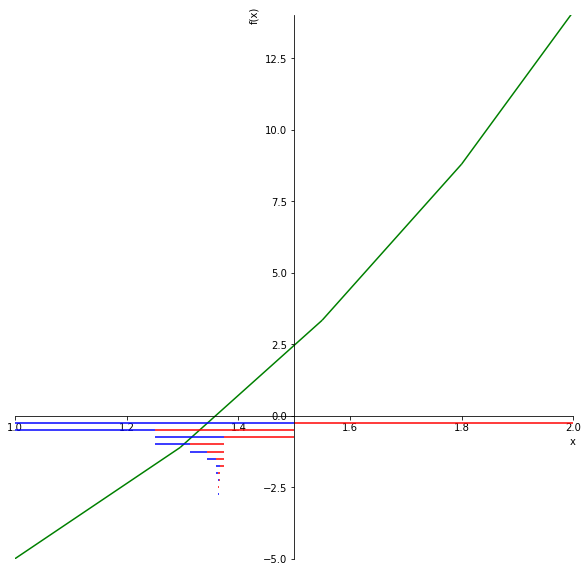

In [2]:
#Método da Bissecção para determinar uma raiz de uma função em uma variável do tipo f(x) = 0

#Utiliza a biblioteca sympy, disponível em: http://docs.sympy.org/latest/index.html
#Utiliza a biblioteca matplotlib, disponível em: https://matplotlib.org/

import sympy as sp
import matplotlib.pyplot as plt

def f(a, x, fx): #Retorna o valor numérico da função digitada pelo usuário
    return float(fx.subs(x, a))

x = sp.symbols('x')
fx = sp.sympify(input("Digite a função f(x): "))

TOL = abs(float(input("Tolerância para o tamanho do intervalo (b-a)/2 (digite 0 para desativar): "))) # Tolerância para o tamanho do intervalo (b-a)/2
e = abs(float(input("Tolerância para o erro relativo de p (ponto médio do intervalo) (digite 0 para desativar): "))) # Tolerância para o erro relativo de p
efp = abs(float(input("Tolerância para o valor de f(p) ~= 0 (digite 0 para desativar): "))) # Tolerância para f(p) ~= 0
N0 = abs(int(input("Número máximo de iterações: "))) # Número máximo de iterações

# Variáveis extras para o cálculo
TOL_val=0.0
e_val=0.0
FP=0.0
pn=0.0
n=0
i=0.0
passo=0.0

# Obtém a e b e testa se f(a) e f(b) possuem sinais opostos
while (True):
    a = float(input("Defina a: "))
    b = float(input("Defina b: "))
    if (f(a,x,fx)*f(b,x,fx) > 0.0):
        print("f(a) e f(b) devem ter sinais opostos!")
        continue
    elif (abs(f(a,x,fx)) <= efp):
        print("a já é uma raiz da função para a tolerância desejada!")
        N0 = -1 # Para finalizar o programa
    elif (abs(f(b,x,fx)) <= efp):
        print("b já é uma raiz da função para a tolerância desejada!")
        N0 = -1 # Para finalizar o programa
    break

# Plota o gráfico da função no intervalo [a, b]
plt.rcParams['figure.figsize'] = 10, 10 # Tamanho da figura
graf1 = sp.plotting.plot(fx,show=sp.false) # Plota o gráfico da função
if (a<b): # Determina os limites do eixo x
    graf1.xlim = [a, b]
else:
    graf1.xlim = [b, a]
# Determina os limites do eixo y do gráfico e calcula o passo com que a sequência de subdivisões de [a, b] serão plotadas no eixo y
if (f(a,x,fx) < 0):
    graf1.ylim = [f(a,x,fx), f(b,x,fx)]
    passo = abs(f(a,x,fx))/N0
else:
    graf1.ylim = [f(b,x,fx), f(a,x,fx)]
    passo = abs(f(b,x,fx))/N0    
graf1[0].line_color = 'green' # Cor da linha do gráfico da função
graf1.legend = sp.false # Não mostrar legenda

# Realiza os cálculos do método da biseccção
print ('\nn\t a\t         b\t         p\t         f(p)\t         (b-a)/2\t erro relativo de p')
for n in range (1, N0+1):
    p = (a+b)/2
    i -= passo # i vai descendo no eixo y e plotando as subdivisões do intervalo [a, b] uma abaixo da outra
    graf1.append(sp.plotting.plot(i, (x, a, p), show=sp.false, line_color='blue')[0]) # Plota a próxima subdivisão do intervalo [a, p]
    graf1.append(sp.plotting.plot(i, (x, p, b), show=sp.false, line_color='red')[0]) # Plota a próxima subdivisão do intervalo [p, b]
    FP = f(p,x,fx)
    TOL_val = abs((b-a)/2)
    if(p != 0.0): 
        e_val = abs((pn-p)/p)
    print (n, '\t', "{:.10f}".format(a), '\t', "{:.10f}".format(b), '\t', "{:.10f}".format(p), '\t', "{:.10f}".format(FP), '\t', "{:.10f}".format(TOL_val), '\t', "{:.10f}".format(e_val))
    if (abs(FP) <= efp or TOL_val < TOL or  e_val < e): #Se F(p) ~= 0 ou (b-2)/2 < erro ou erro relativo de p < erro, encerra o programa
        print ("\nA raiz da função, dentro dos parâmetros de tolerância, é", p)
        break
    if (FP * f(a,x,fx) > 0.0):
        a = p
    else:
        b = p
    pn = p

print ("\nO método da Bissecção foi encerrado após", n, "iterações.")
graf1.show() # Mostra o gráfico ao final
